In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [2]:
import pandas as pd
#fetch data이므로 온라인으로만 fetch가능
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')
california_dataset = pd.read_csv('C:/Users/gihun/python_Data/data/california_dataset.csv')
print()
california_dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [11]:
import os
path = os.getcwd()
print(path)

c:\Users\gihun\Python


[California_datasets](C:/Users/gihun/Python/california_datasets.png)

<img src="./california_datasets.png" width="450" height="450" alt="california_datasets"></img>

In [3]:
# 탐색
#데이터프레임으로 변환

# 기초 통계량 확인
california_dataset.info() # notnull 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


0 MedInc
1 HouseAge
2 AveRooms
3 AveBedrms
4 Population
5 AveOccup
6 Latitude
7 Longitude


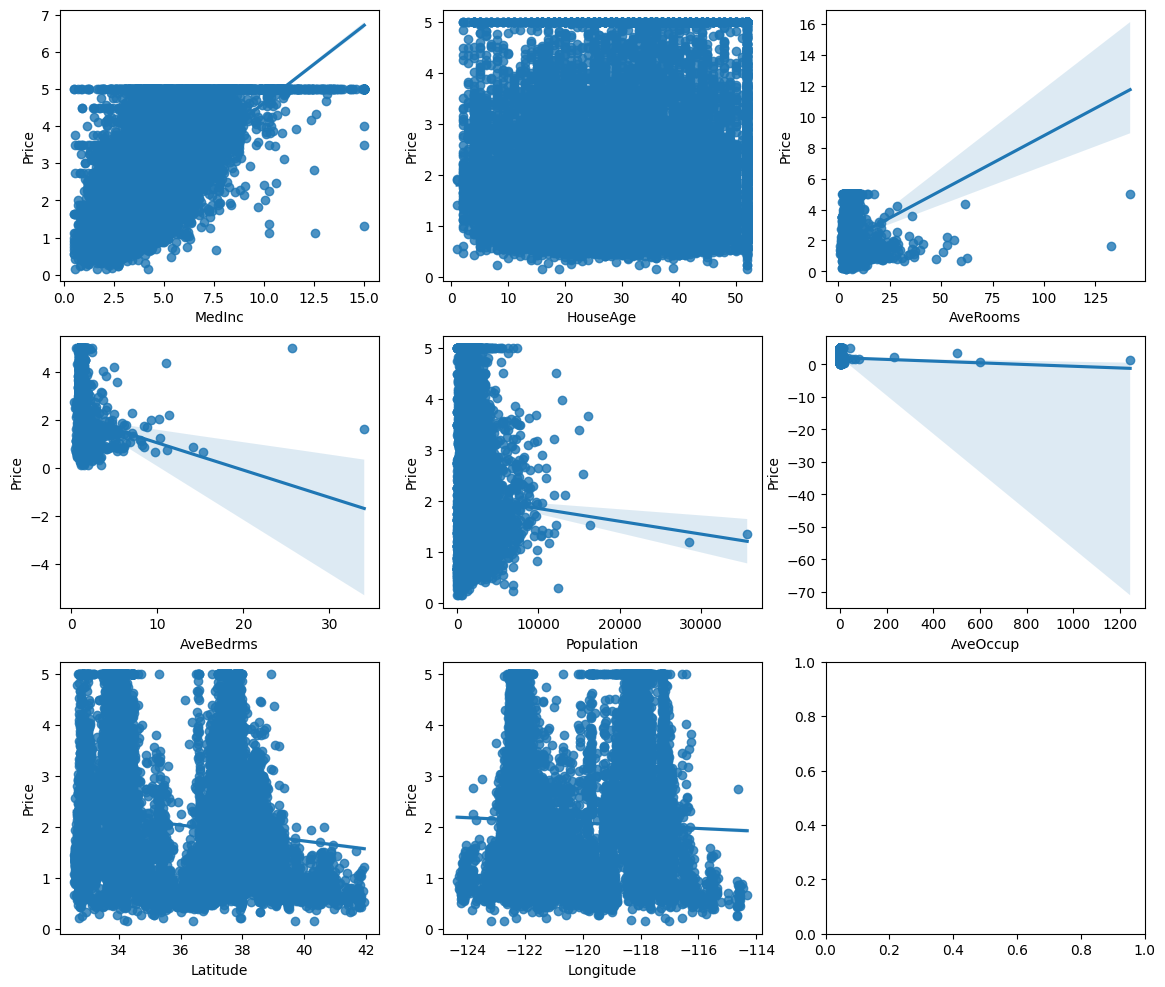

In [4]:
# 종속(price)변수 VS 독립변수(8개)  관계 시각화 탐색
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,12),nrows=3,ncols=3)
for idx , feature in enumerate(california_dataset.columns[:-1]):
    row = idx // 3
    col = idx % 3
    print(idx,feature)
    sns.regplot(x=feature,y='Price',data=california_dataset,ax=ax[row][col])

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

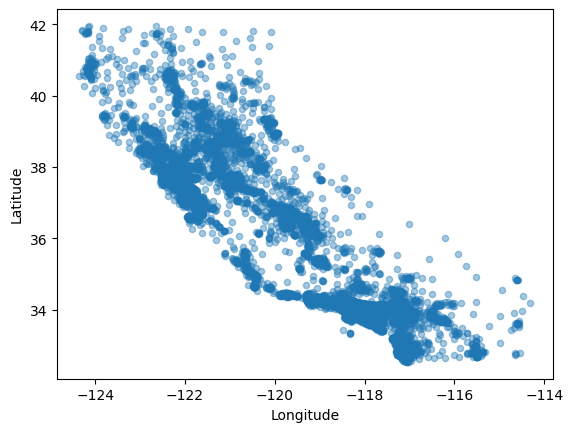

In [15]:
# 위경도 정보에 따라 블록별로 산점도를 그리되 거주 인구수에 비례하게 점의 크기를 정하고, 주택 가격에 따라 점의 크기를 정한다
california_dataset.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.4)

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

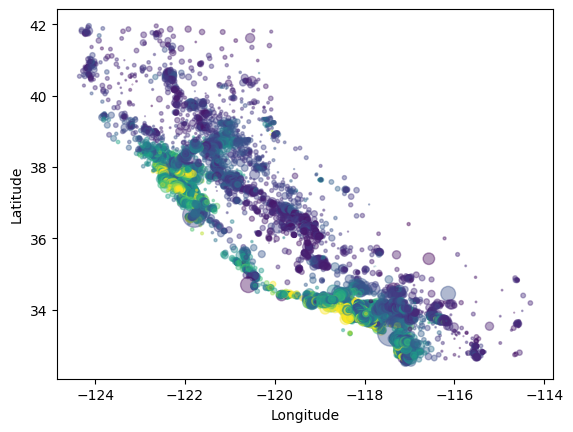

<Figure size 500x500 with 0 Axes>

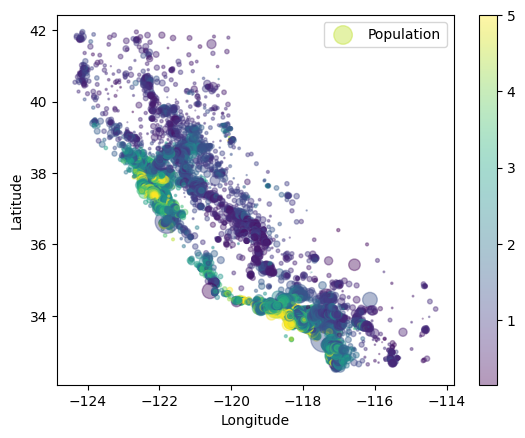

In [18]:
california_dataset.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.4,s=california_dataset['Population']/100, c=california_dataset['Price'])
plt.figure(figsize=(5,5))
california_dataset.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.4,s=california_dataset['Population']/100, c=california_dataset['Price'],cmap=plt.get_cmap('viridis'),label='Population')

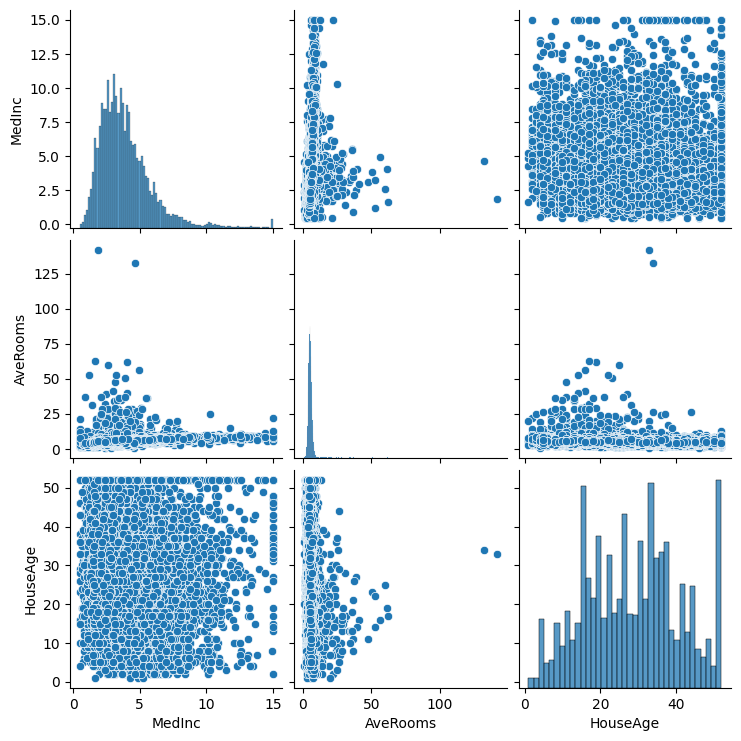

In [5]:
# 독립변수 간 상관관계 확인
# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다
#pairplot 시각화
# 유의미한 관계를 보인것 같은 MedInc와 AveRooms, HouseAge만 골라보고 싶었음
feature_list = ['MedInc','AveRooms','HouseAge']
sns.pairplot(california_dataset[feature_list])

<AxesSubplot: >

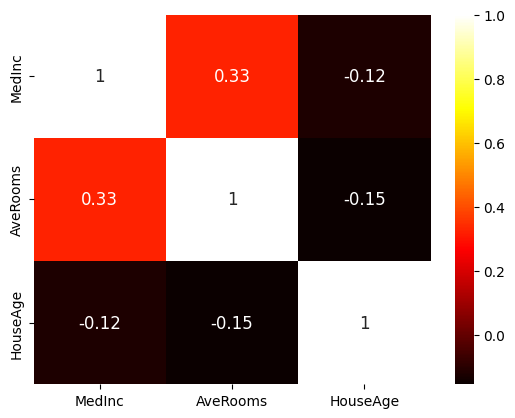

In [6]:
# 상관 계수 히트맵

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


# 변수 간의 상관 계수를 구한다

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션
corr = california_dataset[feature_list].corr()
sns.heatmap(corr,annot=True,annot_kws={'size':12},cmap='hot')


In [7]:
# 선형회귀 모델 구축
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
Lr2 = LinearRegression()
# 분리
X_train2, X_test2, y_train2, y_test2 = train_test_split(california_dataset.drop(columns='Price').values,california_dataset['Price'],test_size=0.2,random_state=27)
X_train2.shape
# 회귀식으로 표현
reg2 = Lr2.fit(X_train2, y_train2)
wn = reg2.coef_
w0 = reg2.intercept_
print()
print(f'y = {w0} ',end='')
for i in range(len(wn)):
    print(f'+ {wn[i]:.2f}x{i+1}',end='')



y = -37.263413513024595 + 0.44x1+ 0.01x2+ -0.12x3+ 0.80x4+ 0.00x5+ -0.00x6+ -0.42x7+ -0.44x8

In [22]:
import numpy as np
pd.options.display.float_format = '{:.3f}'.format

In [23]:
pd.Series(data=wn,index=housing.feature_names)

MedInc        0.444
HouseAge      0.010
AveRooms     -0.120
AveBedrms     0.798
Population    0.000
AveOccup     -0.003
Latitude     -0.423
Longitude    -0.437
dtype: float64

In [8]:

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred2 = reg2.predict(X_test2)

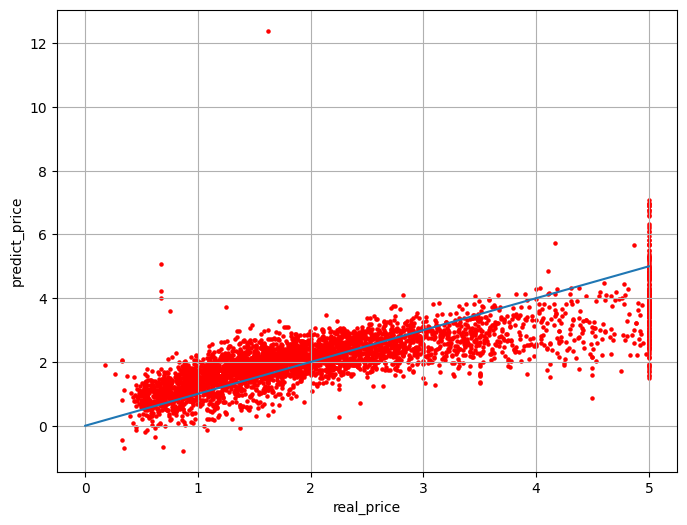

In [19]:
# 결과 시각화 ( actual price VS predicted price)
plt.figure(figsize=(8,6))
plt.scatter(y_test2,y_pred2,s=5,c='r')
plt.xlabel('real_price')
plt.ylabel('predict_price')
plt.plot([0,5],[0,5])
plt.grid()
plt.show() #다른 모델을 써보든가, 독립변수를 바꾸든가, 해서 좋은 결과를 도출하면 됨.

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
# 평가 지표 계산
mse2 = mean_squared_error(y_test2,y_pred2)
rmse2 = np.sqrt(mse2)
r2_ = r2_score(y_test2,y_pred2) # 캘리포니아 결정 계수
print(mse2, rmse2, r2_)
n2 = len(X_train2)
k2 = len(california_dataset.columns[:-1])
# 수정된 결정 계수 확인(Ajusted-R2)
adj_r2_ = 1-((1-r2_)*(n2-1))/(n2-k2-1)
#데이터의 크기
print(n2)
#독립변수의 갯수
print(k2)
# 수정된 결정 계수
print(adj_r2_)

0.5423293447570139 0.7364301356931382 0.5886851927020104
16512
8
0.5884858035934614
